<a href="https://colab.research.google.com/github/rsaketh002/100-nlp-papers/blob/master/Contradictory%2C%20My%20Dear%20Watson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gandeedsaketh","key":"05c8f8f5ff51d6f5a5f7d7f452b59742"}'}

In [3]:
 ! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [4]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [5]:
 ! kaggle datasets list

ref                                                                title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/apple-quality                                     Apple Quality                                      170KB  2024-01-11 14:31:07           6848        163  1.0              
saimondahal/life-expectancy-trends-for-males-and-females           Life Expectancy Trends for Males and Females       263KB  2024-01-28 09:26:09            782         28  1.0              
hummaamqaasim/jobs-in-data                                         Jobs and Salaries in Data Science                   76KB  2023-12-25 20:03:32          13087        239  1.0              
yashusinghal/electric-vehicle-population-dataset  

In [6]:
!kaggle competitions download -c contradictory-my-dear-watson

  0% 0.00/1.78M [00:00<?, ?B/s]
100% 1.78M/1.78M [00:00<00:00, 190MB/s]


In [7]:
! mkdir train

In [8]:
! unzip /content/contradictory-my-dear-watson.zip -d train

Archive:  /content/contradictory-my-dear-watson.zip
  inflating: train/sample_submission.csv  
  inflating: train/test.csv          
  inflating: train/train.csv         


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [10]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.1 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.2 MB/s eta 0:00:00


In [11]:
df = pd.read_csv('/content/train/train.csv')

In [12]:
df.head()

,id,premise,hypothesis,lang_abv,language,label
0,5130fd2cb5,and these comments were considered in formulat...,The rules developed in the interim were put to...,en,English,0
1,5b72532a0b,These are issues that we wrestle with in pract...,Practice groups are not permitted to work on t...,en,English,2
2,3931fbe82a,Des petites choses comme celles-là font une di...,J'essayais d'accomplir quelque chose.,fr,French,0
3,5622f0c60b,you know they can't really defend themselves l...,They can't defend themselves because of their ...,en,English,0
4,86aaa48b45,ในการเล่นบทบาทสมมุติก็เช่นกัน โอกาสที่จะได้แสด...,เด็กสามารถเห็นได้ว่าชาติพันธุ์แตกต่างกันอย่างไร,th,Thai,1


In [13]:
checkpoint='xlm-roberta-large'

In [14]:
df.shape

(12120, 6)

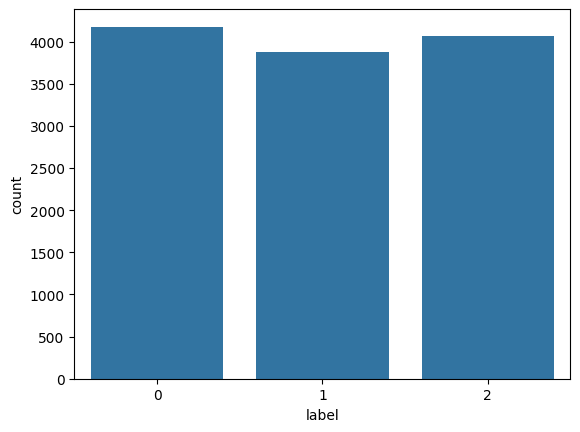

In [15]:
sns.countplot(x='label',data=df);

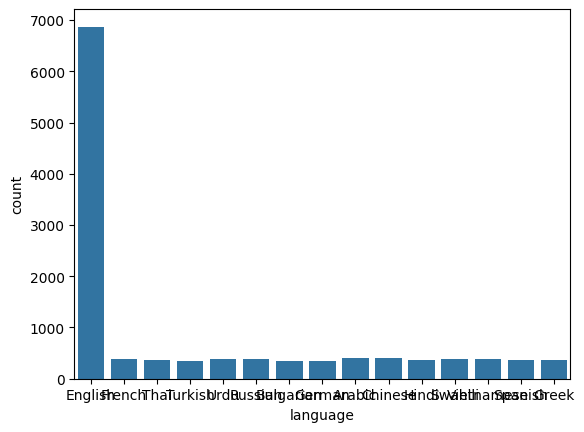

In [16]:
sns.countplot(x='language',data=df);

In [17]:
df['language'].unique()

array(['English', 'French', 'Thai', 'Turkish', 'Urdu', 'Russian',
       'Bulgarian', 'German', 'Arabic', 'Chinese', 'Hindi', 'Swahili',
       'Vietnamese', 'Spanish', 'Greek'], dtype=object)

In [18]:
checkpoint

'xlm-roberta-large'

In [19]:
from transformers import AutoTokenizer,TFAutoModelForSequenceClassification

In [20]:
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

config.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

In [21]:
from datasets import load_dataset

In [22]:
dataset=df.drop(['id','lang_abv','language'],axis=1)

In [23]:
dataset.head()

,premise,hypothesis,label
0,and these comments were considered in formulat...,The rules developed in the interim were put to...,0
1,These are issues that we wrestle with in pract...,Practice groups are not permitted to work on t...,2
2,Des petites choses comme celles-là font une di...,J'essayais d'accomplir quelque chose.,0
3,you know they can't really defend themselves l...,They can't defend themselves because of their ...,0
4,ในการเล่นบทบาทสมมุติก็เช่นกัน โอกาสที่จะได้แสด...,เด็กสามารถเห็นได้ว่าชาติพันธุ์แตกต่างกันอย่างไร,1


In [24]:
df=dataset

In [25]:
df.head()

,premise,hypothesis,label
0,and these comments were considered in formulat...,The rules developed in the interim were put to...,0
1,These are issues that we wrestle with in pract...,Practice groups are not permitted to work on t...,2
2,Des petites choses comme celles-là font une di...,J'essayais d'accomplir quelque chose.,0
3,you know they can't really defend themselves l...,They can't defend themselves because of their ...,0
4,ในการเล่นบทบาทสมมุติก็เช่นกัน โอกาสที่จะได้แสด...,เด็กสามารถเห็นได้ว่าชาติพันธุ์แตกต่างกันอย่างไร,1


In [26]:
from datasets import Dataset

In [27]:
dataset = Dataset.from_pandas(df)

In [28]:
dataset=dataset.train_test_split(test_size=0.2,shuffle=True)

In [29]:
dataset

DatasetDict({
    train: Dataset({
        features: ['premise', 'hypothesis', 'label'],
        num_rows: 9696
    })
    test: Dataset({
        features: ['premise', 'hypothesis', 'label'],
        num_rows: 2424
    })
})

In [30]:
def preprocess(ans):
  return tokenizer(ans['premise'],ans['hypothesis'],truncation=True)

In [31]:
tokenized_dataset = dataset.map(preprocess, batched=True)

Map:   0%|          | 0/9696 [00:00<?, ? examples/s]

Map:   0%|          | 0/2424 [00:00<?, ? examples/s]

In [32]:
tokenized_dataset=tokenized_dataset.remove_columns(['premise','hypothesis'])

In [33]:
from transformers import DataCollatorWithPadding

In [34]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer,return_tensors='tf')

In [35]:
from sklearn.metrics import accuracy_score,f1_score

In [36]:
def compute_metrics(eval_pred):
  predictions,labels=eval_pred
  predictions=np.argmax(predictions,axis=1)
  accuracy=accuracy_score(labels,predictions)
  f1=f1_score(labels,predictions,average='weighted')
  return {'accuracy':accuracy,'f1':f1}

In [37]:
id2label = {0: "entailment", 1: "neutral",2: "contradiction"}
label2id = {"entailment": 0, "neutral": 1, "contradiction": 2}

In [39]:
from transformers import create_optimizer

batch_size=32
epochs=3
batches_per_epoch=len(tokenized_dataset['train'])//batch_size
total_train_steps=int(batches_per_epoch*epochs)
optimizer,schedule=create_optimizer(init_lr=2e-5,num_train_steps=total_train_steps,num_warmup_steps=0)

In [40]:
model=TFAutoModelForSequenceClassification.from_pretrained(checkpoint,num_labels=3,id2label=id2label,label2id=label2id)

model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFXLMRobertaForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFXLMRobertaForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [41]:
tf_train_dataset=model.prepare_tf_dataset(tokenized_dataset['train'],shuffle=True,batch_size=batch_size,collate_fn=data_collator)

You're using a XLMRobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


In [42]:
val_dataset=model.prepare_tf_dataset(tokenized_dataset['test'],shuffle=False,batch_size=batch_size,collate_fn=data_collator)

In [43]:
next(iter(tf_train_dataset))

({'input_ids': <tf.Tensor: shape=(32, 77), dtype=int64, numpy=
  array([[     0,     87,  23409, ...,      1,      1,      1],
         [     0,  88949,    111, ...,      1,      1,      1],
         [     0, 220472,    619, ...,      1,      1,      1],
         ...,
         [     0,   5299,     17, ...,      1,      1,      1],
         [     0,      6,  72565, ...,      1,      1,      1],
         [     0,  63769,     70, ...,      1,      1,      1]])>,
  'attention_mask': <tf.Tensor: shape=(32, 77), dtype=int64, numpy=
  array([[1, 1, 1, ..., 0, 0, 0],
         [1, 1, 1, ..., 0, 0, 0],
         [1, 1, 1, ..., 0, 0, 0],
         ...,
         [1, 1, 1, ..., 0, 0, 0],
         [1, 1, 1, ..., 0, 0, 0],
         [1, 1, 1, ..., 0, 0, 0]])>},
 <tf.Tensor: shape=(32,), dtype=int64, numpy=
 array([2, 0, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2, 1, 1, 0, 2, 2, 2, 0, 1, 0, 1,
        2, 2, 0, 0, 2, 1, 1, 0, 0, 0])>)

In [44]:
model.compile(optimizer=optimizer)

In [45]:
from transformers.keras_callbacks import KerasMetricCallback

In [46]:
metric_callback=KerasMetricCallback(compute_metrics,eval_dataset=val_dataset)

In [47]:
callbacks=[metric_callback]

In [48]:
model.fit(tf_train_dataset,epochs=epochs,callbacks=callbacks,validation_data=val_dataset)

Epoch 1/3
303/303 [==============================] - 282s 656ms/step - loss: 1.0552 - val_loss: 0.7348 - accuracy: 0.6394 - f1: 0.5836
Epoch 2/3
303/303 [==============================] - 171s 563ms/step - loss: 0.6675 - val_loss: 0.5153 - accuracy: 0.8012 - f1: 0.8001
Epoch 3/3
303/303 [==============================] - 168s 556ms/step - loss: 0.4349 - val_loss: 0.5111 - accuracy: 0.8057 - f1: 0.8057


In [49]:
model.save_pretrained('/content/contradiction-model',tokenizer=tokenizer)

In [50]:
test_df=pd.read_csv('/content/train/test.csv')

In [51]:
test_df.head()

,id,premise,hypothesis,lang_abv,language
0,c6d58c3f69,بکس، کیسی، راہیل، یسعیاہ، کیلی، کیلی، اور کولم...,"کیسی کے لئے کوئی یادگار نہیں ہوگا, کولمین ہائی...",ur,Urdu
1,cefcc82292,هذا هو ما تم نصحنا به.,عندما يتم إخبارهم بما يجب عليهم فعله ، فشلت ال...,ar,Arabic
2,e98005252c,et cela est en grande partie dû au fait que le...,Les mères se droguent.,fr,French
3,58518c10ba,与城市及其他公民及社区组织代表就IMA的艺术发展进行对话&amp,IMA与其他组织合作，因为它们都依靠共享资金。,zh,Chinese
4,c32b0d16df,Она все еще была там.,"Мы думали, что она ушла, однако, она осталась.",ru,Russian


In [52]:
model1=TFAutoModelForSequenceClassification.from_pretrained('/content/contradiction-model')

All model checkpoint layers were used when initializing TFXLMRobertaForSequenceClassification.

All the layers of TFXLMRobertaForSequenceClassification were initialized from the model checkpoint at /content/contradiction-model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFXLMRobertaForSequenceClassification for predictions without further training.


In [53]:
test_df.drop(['lang_abv','language'],axis=1,inplace=True)

In [54]:
test_df=Dataset.from_pandas(test_df)

In [55]:
test_df=test_df.map(preprocess,batched=False)

Map:   0%|          | 0/5195 [00:00<?, ? examples/s]

In [56]:
test_inputs=model.prepare_tf_dataset(test_df,shuffle=False,batch_size=1,collate_fn=data_collator)

In [57]:
predictions=model.predict(test_inputs)

5195/5195 [==============================] - 207s 39ms/step


In [58]:
predictions=tf.nn.softmax(predictions['logits'])

In [59]:
predictions = [np.argmax(i) for i in predictions]

In [60]:
result_df = pd.DataFrame({'id': test_df['id'], 'prediction': predictions})

In [61]:
result_df.head()

,id,prediction
0,c6d58c3f69,2
1,cefcc82292,1
2,e98005252c,0
3,58518c10ba,1
4,c32b0d16df,1


from matplotlib import pyplot as plt
_df_0['prediction'].plot(kind='hist', bins=20, title='prediction')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('id').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['prediction'].plot(kind='line', figsize=(8, 4), title='prediction')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='prediction', y='id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

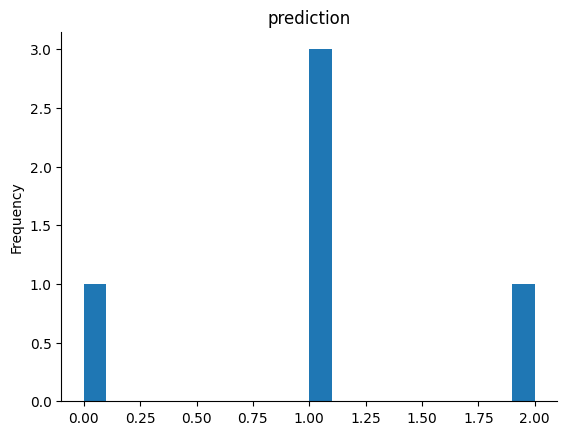

In [64]:
from matplotlib import pyplot as plt
_df_0['prediction'].plot(kind='hist', bins=20, title='prediction')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [62]:
result_df.to_csv('submission.csv', index=False)

In [63]:
model.summary()

Model: "tfxlm_roberta_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 roberta (TFXLMRobertaMainL  multiple                  558840832 
 ayer)                                                           
                                                                 
 classifier (TFXLMRobertaCl  multiple                  1052675   
 assificationHead)                                               
                                                                 
Total params: 559893507 (2.09 GB)
Trainable params: 559893507 (2.09 GB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
